In [38]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [40]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIS420/datasets/diamonds.csv')

In [41]:
print(data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [43]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [44]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [45]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [46]:
# resultado
print(data)

       Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               1   0.23    2      1        3   61.5   55.0    326  3.95   
1               2   0.21    3      1        2   59.8   61.0    326  3.89   
2               3   0.23    1      1        4   56.9   65.0    327  4.05   
3               4   0.29    3      5        5   62.4   58.0    334  4.20   
4               5   0.31    1      6        3   63.3   58.0    335  4.34   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
53935       53936   0.72    2      0        2   60.8   57.0   2757  5.75   
53936       53937   0.72    1      0        2   63.1   55.0   2757  5.69   
53937       53938   0.70    4      0        2   62.8   60.0   2757  5.66   
53938       53939   0.86    3      4        3   61.0   58.0   2757  6.15   
53939       53940   0.75    2      0        3   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int64  
 3   color       53940 non-null  int64  
 4   clarity     53940 non-null  int64  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.5 MB


In [48]:
# Lectura de Datos
y = data.iloc[:, 7]
X = data.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
m = y.size

In [49]:
print(X)
print('*'*25)
print(y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
*************************
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Na

In [50]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [51]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
Media calculada: carat       0.797940
cut         2.553003
color       2.594197
clarity     3.835150
depth      61.749405
table      57.457184
x           5.731157
y           5.7345

In [52]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [53]:
print(X)

[[ 1.         -1.19816781 -0.53809897 ... -1.58783745 -1.53619556
  -1.57112919]
 [ 1.         -1.24036129  0.43494935 ... -1.64132529 -1.65877419
  -1.74117497]
 [ 1.         -1.19816781 -1.51114729 ... -1.49869105 -1.45739502
  -1.74117497]
 ...
 [ 1.         -0.20662095  1.40799767 ... -0.06343409 -0.04774083
   0.03013526]
 [ 1.          0.13092691  0.43494935 ...  0.37338325  0.33750627
   0.28520393]
 [ 1.         -0.10113725 -0.53809897 ...  0.08811478  0.11861587
   0.14349912]]


In [54]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [55]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [3906.36693467 1701.77682655   82.50638732 -352.94503692  524.44637334
  -96.81512965 -168.00544013  850.53013465  669.79249752  649.90581553]
El valor predecido es (usando el descenso por el gradiente): 47546.1247


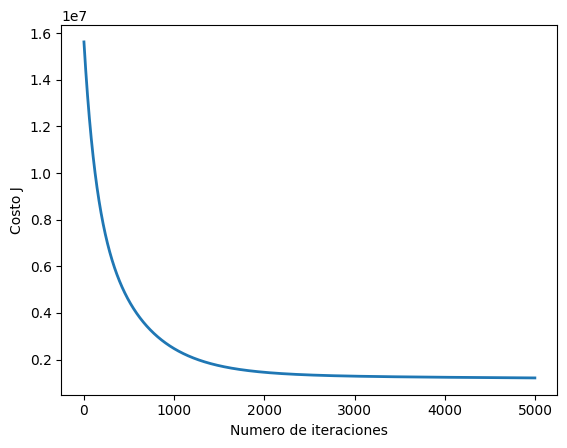

In [56]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de un diamante con distintas caracteristicas
X_array = [1, 4, 140, 43, 1, 20, 1.49, 28, 5, 11]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [57]:
X_array = [1, 4, 140, 43, 1, 20, 1.49, 28, 5, 11]
X_array[1:10] = (X_array[1:13] - mu) / sigma

In [58]:
X_array[1:10]

[6.755303744422724,
 133.74256896365998,
 23.75290331425014,
 -1.6439702346689673,
 -29.14223832174999,
 -25.04718687900553,
 19.85187062140965,
 -0.6431227246947845,
 10.572973751597988]

In [59]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [62]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para un diamante

X_array = [1, 4, 140, 43, 1, 20, 1.49, 28, 5, 11]
price = np.dot(X_array, theta)

print('Precio predecido para cada diamante (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 3.93279972e+03  5.20377762e+03  7.26492878e+01 -4.53259231e+02
  4.96413363e+02 -2.21048972e+02 -2.08512221e+02 -1.32919057e+03
  5.39868020e+01 -1.19125129e+00]
Precio predecido para cada diamante (usando la ecuación de la normal): $-25767
